# DTFT - DFT Rechner

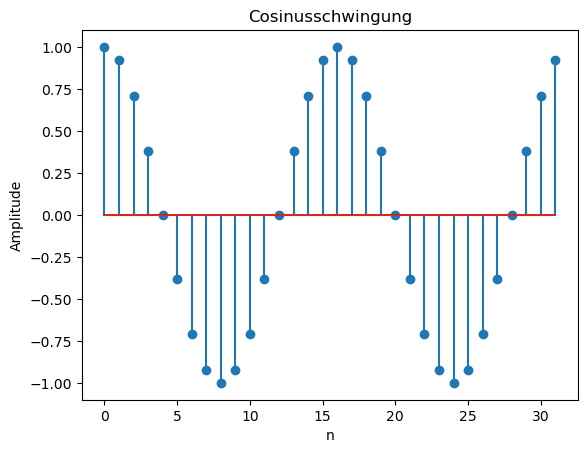

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter der Aufgabenstellung
n = np.arange(32)
N = 32
W_0 = 4 * np.pi / N

# Berechnung der Cosinus-Schwingung
function = np.cos(W_0 * n)

# Darstellung der Cosinus-Schwingung
plt.stem(n, function)

plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Cosinusschwingung')
plt.show()

Die Phase ist an den relevanten Stellen (2 und 30) bei allen drei DFTs gleich.
Alle anderen Werte sind quasie Zufallswerte und werden daher nicht berücksichtigt.


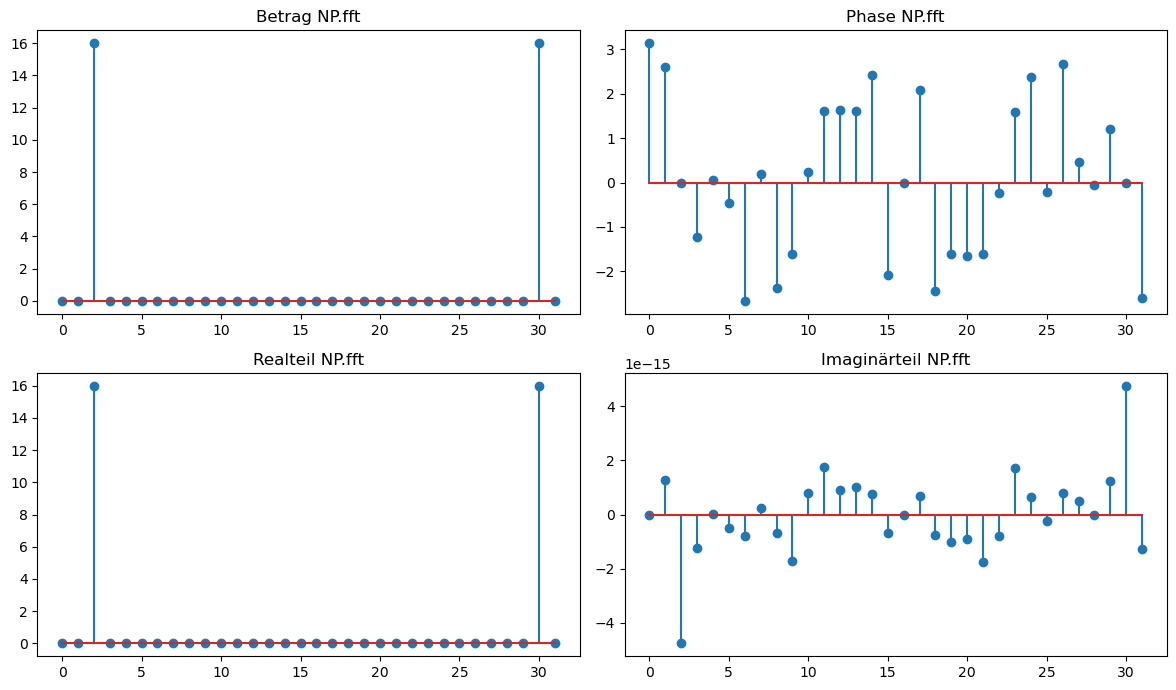

In [13]:
# Zuweisung der DFT
dft_NP = np.fft.fft(function)

# Plot der DFTs
fig ,ax = plt.subplots(2, 2, figsize=(12, 7))

# Plot der np.fft.fft Funktion
ax[0][0].set_title('Betrag NP.fft')
ax[0][0].stem(n, np.abs(dft_NP))
ax[0][1].set_title('Phase NP.fft')
ax[0][1].stem(np.angle(dft_NP))
ax[1][0].set_title('Realteil NP.fft')
ax[1][0].stem(np.real(dft_NP))
ax[1][1].set_title('Imaginärteil NP.fft')
ax[1][1].stem(np.imag(dft_NP))

plt.tight_layout()

# Fazit
print("Die Phase ist an den relevanten Stellen wo der Betrag einen Peak hat, 0. (Muss sein)")
print("Alle anderen Werte sind quasie Zufallswerte und werden daher nicht berücksichtigt.")
